# Self-Propagation figures on ANN (RBM)

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import xlrd
import matplotlib.ticker as ticker

In [2]:
def extract(inpath,col):
    data = xlrd.open_workbook(inpath, encoding_override='utf-8')
    table = data.sheets()[0]
    nrows = table.nrows
    ncols = table.ncols
    result=[]
    for i in range(0, nrows):
        alldata = table.row_values(i)
        item = alldata[col]
        result.append(item)
    return result
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.1f'%(100*temp) + '%'

def saveMatrix(matrix,name):
    dataframe = pd.DataFrame(data=matrix)# Construct data as DataFrame 
    filename = str(name) + '.xlsx'
    writer = pd.ExcelWriter(filename)
    dataframe.to_excel(writer,sheet_name='Sheet1',float_format='%.5f',index=False)
    writer.save()

def readMatrix(name):
    data = pd.read_excel(open(name, 'rb'),sheet_name='Sheet1')
    matrix = data.values
    return matrix

def calEnergy(matrix):
    (len_pos,len_neg) = matrix.shape
    energy  = 0
    for wake in range(len_pos):
        for sleep in range(len_neg):
            energy += ((wake*4+1+sleep*4+1)*matrix[wake][sleep])
    return energy/(len_pos*len_neg)

def calLabel(matrix):
    (len_pos,len_neg) = matrix.shape
    label = 0
    for wake in range(len_pos):
        for sleep in range(len_neg):
            label += ((wake*4+1)*matrix[wake][sleep])
    return label/(len_pos*len_neg)

def extractTXT(inpath,trainortest):
    dataindex = 0
    n_it_neg = 0
    n_it_pos = 0
    errList = []
    sbp =0 
    with open(inpath, "r") as f:
        datas = f.readlines()
        for line in datas:
            dataindex += 1
            if trainortest+' error:' in line:
                break
        if dataindex!=0 and dataindex!=len(datas):
            accdata = datas[dataindex]
            accdata = accdata.replace('[','')
            accdata = accdata.replace(']','')
            errList = accdata.split(',')
            errList = [float(err) for err in errList]
    return errList

## Training set

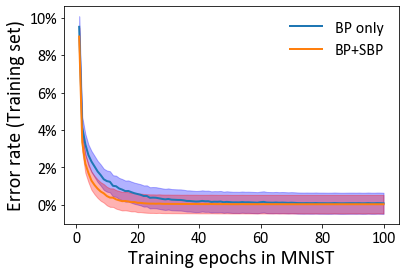

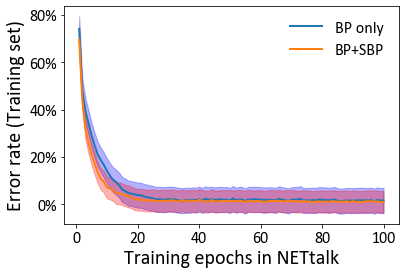

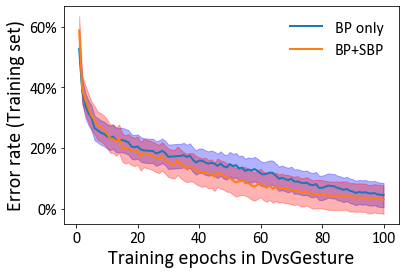

In [3]:
# MNIST
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.f'%(temp) + '%'
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extractTXT('data/Figure/log/log_-2020-06-07-23-52-47_mnist.txt','training'))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5

plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP only')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-00-06-05_mnist.xlsx',1))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP+SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(False)
ax.legend(loc='upper right',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
fig.savefig('Figure/ANN_train_MNIST.svg')

# NETtalk
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-02-55-29_nettalk.xlsx',1))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP only')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-02-58-55_nettalk.xlsx',1))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP+SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(False)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
fig.savefig('Figure/ANN_train_NETTalk.svg')


# DvsGesture
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-03-02-45_gesture.xlsx',1))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP only')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-03-06-26_gesture.xlsx',1))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP+SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(False)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Training set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
fig.savefig('Figure/ANN_train_DVSGesture.svg')

## Test set

### line figure

without SBP mni: 2.080000000000002 0.17812873855725983
with SBP mni: 2.08 0.1292801125463628
without SBP mni: 16.9999999999999 2.9345282414725644
with SBP mni: 15.8 2.388284740143023
without SBP mni: 32.9824561403508 1.7746366332450731
with SBP mni: 29.1228070175438 1.6707162252901682
(array([94], dtype=int64),) (array([66, 67, 68, 75, 76, 87], dtype=int64),)
(array([], dtype=int64),) (array([], dtype=int64),)


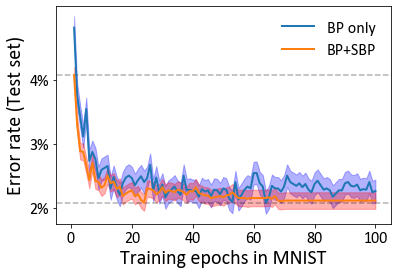

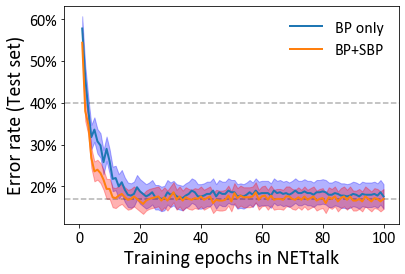

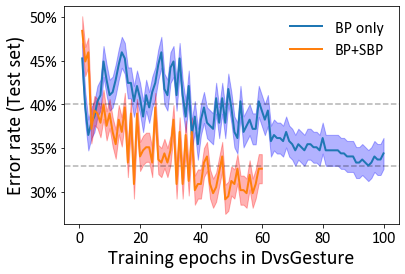

In [53]:
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.f'%(temp) + '%'
# MNIST
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extractTXT('data/Figure/log/log_-2020-06-07-23-52-47_mnist.txt','test'))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std())*0.5
print('without SBP mni:',cal_mean.min(), cal_std)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP only')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-00-06-05_mnist.xlsx',3))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
print('with SBP mni:',cal_mean.min(), cal_std)
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP+SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(False)
ax.legend(loc='upper right',frameon=False)
plt.xlabel('Training epochs in MNIST',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.yticks([2,3,4])
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(),40)
# print(np.where(cal_M1==min_),np.where(cal_mean==min_))
# print(np.where(cal_M1==max_),np.where(cal_mean==max_))
plt.xlim([-5, 105])
plt.hlines(max_, -10, 110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 110, color='k',linestyle='--',alpha=.3)
# fig.savefig('Figure/ANN_test_MNIST.svg')

# NeTtalk
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-02-55-29_nettalk.xlsx',3))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std())*0.5
print('without SBP mni:',cal_mean.min(), cal_std)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP only')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-02-58-55_nettalk.xlsx',3))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
print('with SBP mni:',cal_mean.min(), cal_std)
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP+SBP')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='r', alpha=.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(False)
ax.legend(loc='upper right',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.xlabel('Training epochs in NETtalk',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(),40)
plt.xlim([-5, 105])
plt.hlines(max_, -10, 110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 110, color='k',linestyle='--',alpha=.3)
# fig.savefig('Figure/ANN_test_NETTalk.svg')

# DvsGesture
plt.rcParams.update({'font.size': 16})
fig, ax = plt.subplots(1, 1)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-03-02-45_gesture.xlsx',3))
cal_mean    = np.array(error_list).mean(0)
cal_M1 = cal_mean
cal_std = (np.array(error_list).std())*0.5
print('without SBP mni:',cal_mean.min(), cal_std)
plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
ax.plot(range(1,len(cal_mean)+1),cal_mean,linewidth=2,label='BP only')
ax.fill_between(range(1,len(cal_mean)+1), (cal_mean-1*cal_std), (cal_mean+1*cal_std), color='b', alpha=.3)
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-03-06-26_gesture.xlsx',3))
cal_mean    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
print('with SBP mni:',cal_mean.min(), cal_std)
ax.plot(range(1,61),cal_mean[:60],linewidth=2,label='BP+SBP')
ax.fill_between(range(1,61), (cal_mean[:60]-1*cal_std), (cal_mean[:60]+1*cal_std), color='r', alpha=.3)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['left'].set_color('black')
ax.spines['right'].set_color('black')
ax.grid(False)
ax.legend(loc='upper right',frameon=False)# ,bbox_to_anchor=(1.4, 1)
plt.xlabel('Training epochs in DvsGesture',fontsize=20)
plt.ylabel('Error rate (Test set)',fontsize=20)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
min_ = max(cal_M1.min(), cal_mean.min())
max_ = min(cal_M1.max(), cal_mean.max(),40)
print(np.where(cal_M1==min_),np.where(cal_mean==min_))
print(np.where(cal_M1==max_),np.where(cal_mean==max_))
plt.xlim([-5, 105])
plt.hlines(max_, -10, 110, color='k',linestyle='--',alpha=.3)
plt.hlines(min_, -10, 110, color='k',linestyle='--',alpha=.3)
# fig.savefig('Figure/ANN_test_DVSGesture.svg')

### energy plot

13339200.0 5716800.0


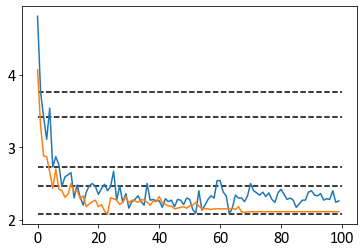

2279000.0 1462000.0


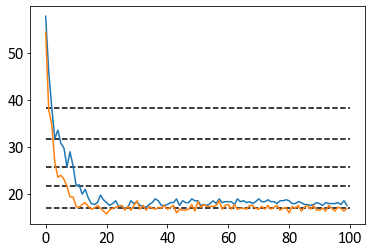

43470000.0 11178000.0


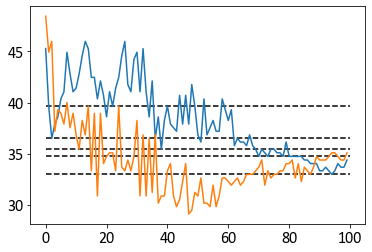

In [19]:
m,n,k,T = 784, 500, 10, 5
cost={}
cost['RBM_MNIST'] = m*n+n*k+k*n+n*m
m,n,k,T = 189, 500, 26, 5
cost['RBM_NETTalk'] = m*n+n*k+k*n+n*m
m,n,k,T = 1024, 500, 11, 5
cost['RBM_DvsGesture'] = m*n+n*k+k*n+n*m
# MNIST-------------------------
error_list = []
error_list.append(extractTXT('data/Figure/log/log_-2020-06-07-23-52-47_mnist.txt','test'))

cal    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
plt.plot(cal)

error_list_sbp = []
error_list_sbp.append(extract('data/Figure/log/log_-2020-06-02-00-06-05_mnist.xlsx',3))
cal_sbp    = np.array(error_list_sbp).mean(0)
cal_std_sbp = (np.array(error_list_sbp).std())*0.5
plt.plot(cal_sbp)

min_ = max(cal.min(), cal_sbp.min())
max_ = min(cal.max(), cal_sbp.max())
x = np.linspace(min_, max_, 5)

no_sbp_list = []
with_sbp_list = []
for i in range(len(x)):
    no_sbp = np.where(cal <= x[i])[0][0]     # epoch - 1
    with_sbp = np.where(cal_sbp <= x[i])[0][0]  # epoch - 1
    plt.hlines(cal[no_sbp], 0, 100, color='k', linestyle='--')
    no_sbp_list.append(no_sbp+1)
    with_sbp_list.append(with_sbp+1)
energy_no_sbp = np.mean(no_sbp_list)*cost['RBM_MNIST']
energy_with_sbp = np.mean(with_sbp_list)*cost['RBM_MNIST']
print(energy_no_sbp, energy_with_sbp)
plt.show()

# NETtalk-------------------------
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-02-55-29_nettalk.xlsx',3))
cal    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
plt.plot(cal)

error_list_sbp = []
error_list_sbp.append(extract('data/Figure/log/log_-2020-06-02-02-58-55_nettalk.xlsx',3))
cal_sbp    = np.array(error_list_sbp).mean(0)
cal_std_sbp = (np.array(error_list_sbp).std())*0.5
plt.plot(cal_sbp)

min_ = max(cal.min(), cal_sbp.min())
max_ = min(cal.max(), cal_sbp.max(),40)
x = np.linspace(min_, max_, 5)

no_sbp_list = []
with_sbp_list = []
for i in range(len(x)):
    no_sbp = np.where(cal <= x[i])[0][0]     # epoch - 1
    with_sbp = np.where(cal_sbp <= x[i])[0][0]  # epoch - 1
    plt.hlines(cal[no_sbp], 0, 100, color='k', linestyle='--')
    no_sbp_list.append(no_sbp+1)
    with_sbp_list.append(with_sbp+1)
energy_no_sbp = np.mean(no_sbp_list)*cost['RBM_NETTalk']
energy_with_sbp = np.mean(with_sbp_list)*cost['RBM_NETTalk']
print(energy_no_sbp, energy_with_sbp)
plt.show()

# DvsGesture-------------------------
error_list = []
error_list.append(extract('data/Figure/log/log_-2020-06-02-03-02-45_gesture.xlsx',3))
cal    = np.array(error_list).mean(0)
cal_std = (np.array(error_list).std())*0.5
plt.plot(cal)

error_list_sbp = []
error_list_sbp.append(extract('data/Figure/log/log_-2020-06-02-03-06-26_gesture.xlsx',3))
cal_sbp    = np.array(error_list_sbp).mean(0)
cal_std_sbp = (np.array(error_list_sbp).std())*0.5
plt.plot(cal_sbp)

min_ = max(cal.min(), cal_sbp.min())
max_ = min(cal.max(), cal_sbp.max(),40)
x = np.linspace(min_, max_, 5)


no_sbp_list = []
with_sbp_list = []
for i in range(len(x)):
    no_sbp = np.where(cal <= x[i])[0][0]     # epoch - 1
    with_sbp = np.where(cal_sbp <= x[i])[0][0]  # epoch - 1
    plt.hlines(cal[no_sbp], 0, 100, color='k', linestyle='--')
    no_sbp_list.append(no_sbp+1)
    with_sbp_list.append(with_sbp+1)
energy_no_sbp = np.mean(no_sbp_list)*cost['RBM_DvsGesture']
energy_with_sbp = np.mean(with_sbp_list)*cost['RBM_DvsGesture']
print(energy_no_sbp, energy_with_sbp)

### bar figure

[0.9758, 0.9789]
[0.0013, 0.0008]
cost
[1.33392 0.57168]
[0.025408  0.0119894]


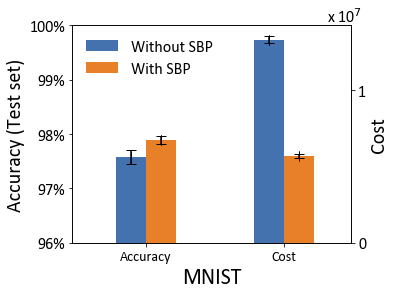

[0.8205, 0.8301000000000001]
[0.0064, 0.0028]
cost
[2.279 1.462]
[0.172   0.03655]


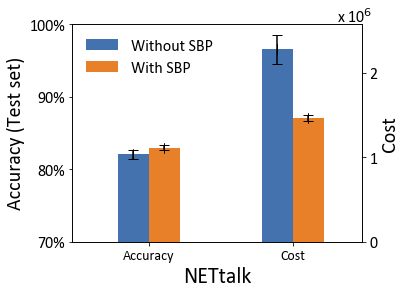

[0.6667000000000001, 0.7088]
[0.0148, 0.0182]
cost
[4.347  1.1178]
[0.012834 0.03726 ]


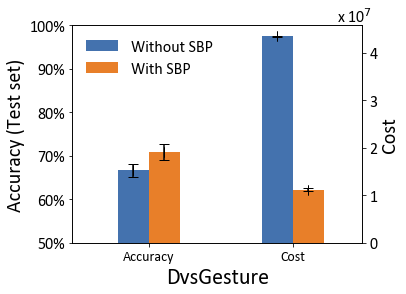

In [52]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
%matplotlib inline
from matplotlib.ticker import FuncFormatter
def to_percent(temp, position):
    return '%1.0f'%(100*temp) + '%'

# MNIST
plt.rcParams['font.family'] = 'Calibri'
plt.rcParams['font.size'] = 16
bar_width = 0.13  
positions = np.arange(2)
fig, ax1 = plt.subplots(figsize=(5,4))
names = ['Accuracy', 'Cost']
scores = [1-2.42/100,1-2.11/100]
print(scores)
print([0.0013,0.0008])
proges = np.array([16.8,7.2])*cost['RBM_MNIST']/1e7
print('cost')
print(proges)
print(np.array([0.32,0.151])*cost['RBM_MNIST']/1e7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax1.bar(positions[0]+0.2, height = scores[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax1.bar(positions[0]+bar_width+0.2, height = scores[1], width=bar_width, color='#E87F29', label=u"With SBP")
plt.errorbar([positions[0]+0.2,positions[0]+bar_width+0.2],[scores[0],scores[1]], fmt=" ", yerr=[0.0013,0.0008], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax1.grid(False)
ax1.set_ylim(0.96, 1.0)
ax1.set_xlabel('MNIST',fontsize=22)
ax1.set_ylabel('Accuracy (Test set)', fontsize=20)
plt.xticks([positions[0]+bar_width/2+0.2, positions[1]+ bar_width/2-0.2], names, fontsize=14)
ax1.errorbar(positions[0],0.1,yerr=0,xerr=0,color='w')
ax2 = ax1.twinx()
ax2.bar(positions[1]-0.2, height = proges[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax2.bar(positions[1]+ bar_width-0.2, height = proges[1], width=bar_width, color='#E87F29', label="Without SBP")
plt.errorbar([positions[1]-0.2,positions[1]+bar_width-0.2],[proges[0],proges[1]], fmt=" ", yerr=np.array([0.32,0.151])*cost['RBM_MNIST']/1e7, xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax2.grid(False)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# ax2.set_ylim(0,1.05)
ax2.errorbar(positions[1]+0.1,0.1,yerr=0,xerr=0,color='w')
ax2.set_ylabel('Cost', fontsize=20)
handles1, labels1 = ax1.get_legend_handles_labels()
plt.text(1.05, 1.45, 'x 10$^{7}$')
plt.legend(handles1, labels1, loc='upper left',frameon=False)#, bbox_to_anchor=(0.5,1.02))
plt.yticks([0,1])
fig.savefig('Figure/ANN_test_MNIST_bar.svg')
plt.show()

# NETtalk
bar_width = 0.13  
positions = np.arange(2)
fig, ax1 = plt.subplots(figsize=(5.2,4))
names = ['Accuracy', 'Cost']
scores = [1-17.95/100,1-16.99/100]
print(scores)
print([0.0064,0.0028])
proges = np.array([10.6,6.8])*cost['RBM_NETTalk']/1e6
print('cost')
print(proges)
print(np.array([0.8,0.17])*cost['RBM_NETTalk']/1e6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax1.bar(positions[0]+0.2, height = scores[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax1.bar(positions[0]+bar_width+0.2, height = scores[1], width=bar_width, color='#E87F29', label=u"With SBP")
plt.errorbar([positions[0]+0.2,positions[0]+bar_width+0.2],[scores[0],scores[1]], fmt=" ", yerr=[0.0064,0.0028], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax1.set_ylim(0.7, 1.0)
ax1.set_xlabel('NETtalk',fontsize=22)
ax1.set_ylabel('Accuracy (Test set)', fontsize=20)
plt.xticks([positions[0]+bar_width/2+0.2, positions[1]+ bar_width/2-0.2], names, fontsize=14)
ax1.errorbar(positions[0],0.1,yerr=0,xerr=0,color='w')
ax2 = ax1.twinx()
ax2.bar(positions[1]-0.2, height = proges[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax2.bar(positions[1]+ bar_width-0.2, height = proges[1], width=bar_width, color='#E87F29', label="Without SBP")
plt.errorbar([positions[1]-0.2,positions[1]+bar_width-0.2],[proges[0],proges[1]], fmt=" ", yerr=np.array([0.8,0.17])*cost['RBM_NETTalk']/1e6, xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# ax2.set_ylim(0,1.05)
ax2.errorbar(positions[1]+0.1,0.1,yerr=0,xerr=0,color='w')
ax2.set_ylabel('Cost', fontsize=20)
handles1, labels1 = ax1.get_legend_handles_labels()
plt.legend(handles1, labels1, loc='upper left',frameon=False)#, bbox_to_anchor=(0.5,1.02))
plt.text(1.05, 2.6, 'x 10$^{6}$')
plt.yticks([0,1,2])
fig.savefig('Figure/ANN_test_NETTalk_bar.svg')
plt.show()


# DvsGesture
bar_width = 0.13  
positions = np.arange(2)
fig, ax1 = plt.subplots(figsize=(5.2,4))
names = ['Accuracy', 'Cost']
scores = [1-33.33/100,1-29.12/100]
print(scores)
print([0.0148,0.0182])
proges = np.array([42,10.8])*cost['RBM_DvsGesture']/1e7
print('cost')
print(proges)
print(np.array([0.124,0.36])*cost['RBM_DvsGesture']/1e7)
plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
ax1.bar(positions[0]+0.2, height = scores[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax1.bar(positions[0]+bar_width+0.2, height = scores[1], width=bar_width, color='#E87F29', label=u"With SBP")
plt.errorbar([positions[0]+0.2,positions[0]+bar_width+0.2],[scores[0],scores[1]], fmt=" ", yerr=[0.0148,0.0182], xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax1.set_ylim(0.5, 1.0)
ax1.set_xlabel('DvsGesture',fontsize=22)
ax1.grid(False)
ax1.set_ylabel('Accuracy (Test set)', fontsize=20)
plt.xticks([positions[0]+bar_width/2+0.2, positions[1]+ bar_width/2-0.2], names, fontsize=14)
ax1.errorbar(positions[0],0.1,yerr=0,xerr=0,color='w')
ax2 = ax1.twinx()
ax2.bar(positions[1]-0.2, height = proges[0], width=bar_width, color='#4472AE', label=u"Without SBP")
ax2.bar(positions[1]+ bar_width-0.2, height = proges[1], width=bar_width, color='#E87F29', label="Without SBP")
plt.errorbar([positions[1]-0.2,positions[1]+bar_width-0.2],[proges[0],proges[1]], fmt=" ", yerr=np.array([0.124,0.36])*cost['RBM_DvsGesture']/1e7, xerr=0,capsize=5,color = "black",capthick = 1,elinewidth=0)
ax2.grid(False)
# plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))
# ax2.set_ylim(0,1.05)
ax2.errorbar(positions[1]+0.1,0.1,yerr=0,xerr=0,color='w')
ax2.set_ylabel('Cost', fontsize=20)
handles1, labels1 = ax1.get_legend_handles_labels()
plt.legend(handles1, labels1, loc='upper left',frameon=False)#, bbox_to_anchor=(0.5,1.02))
plt.text(1.05, 4.65, 'x 10$^{7}$')
fig.savefig('Figure/ANN_test_DVSGesture_bar.svg')
plt.show()

In [6]:
def saveMatrix(matrix,name):
    dataframe = pd.DataFrame(data=matrix)# Construct data as DataFrame 
    filename = str(name) + '.xlsx'
    writer = pd.ExcelWriter(filename)
    dataframe.to_excel(writer,sheet_name='Sheet1',float_format='%.5f',index_label='index')
    writer.save()

def readMatrix(name):
    data = pd.read_excel(open(name, 'rb'),sheet_name='Sheet1')
    matrix = data.values
    return matrix

def calEnergy(matrix):
    (len_pos,len_neg) = matrix.shape
    energy  = 0
    for wake in range(len_pos):
        for sleep in range(len_neg):
            energy += ((wake*4+1+sleep*4+1)*matrix[wake][sleep])
    return energy/(len_pos*len_neg)

def calLabel(matrix):
    (len_pos,len_neg) = matrix.shape
    label = 0
    for wake in range(len_pos):
        for sleep in range(len_neg):
            label += ((wake*4+1)*matrix[wake][sleep])
    return label/(len_pos*len_neg)

# Calculate $\Delta$Acc of sleep phase and wake phase

[[90.09 90.09 90.09 89.7  90.09]
 [62.35  2.1   1.89  1.99  2.09]
 [ 9.95  2.01  2.07  2.03  2.09]
 [ 6.65  2.05  2.02  2.04  2.14]
 [ 7.43  2.1   2.    2.08  1.98]]
[[90.09 90.09 90.09 90.09 90.09]
 [89.91  2.58 13.02  2.36  2.24]
 [77.83  2.21  2.11  2.19  1.87]
 [10.83  2.17  2.31  2.02  2.04]
 [ 6.64  2.35  2.35  2.06  2.21]]
-0.007900000000000018
0.6788
-0.252
0.62
-0.08771930000000006
0.6526316000000001


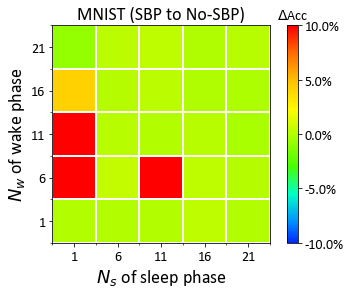

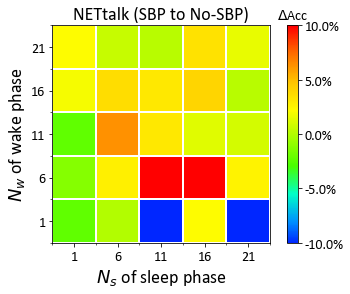

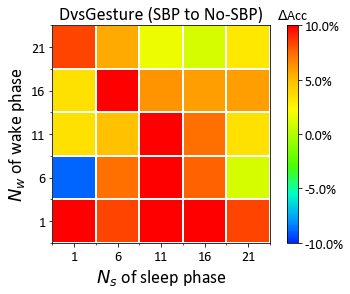

In [7]:
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
from matplotlib import colors
def dcmap():
    file_path='data/output.txt'
    fid=open(file_path)
    data=fid.readlines()
    data.reverse()
    n=len(data);
    rgb=np.zeros((n,3))
    for i in np.arange(2,n-1):
        rgb[i-1][0]=float(data[i].split(' ')[3])
        rgb[i-1][1]=float(data[i].split(' ')[4])
        rgb[i-1][2]=float(data[i].split(' ')[5].split("'")[0])
    rgb[1:-2]=rgb[1:-2]/255
    rgb[1:-2]
    icmap=colors.LinearSegmentedColormap.from_list('color',rgb[1:-2])
    return icmap
def to_percent(temp, position):
    return '%1.1f'%(100*temp) + '%'

# MNIST
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Calibri'
fig, ax = plt.subplots(1, 1)
matrix1 = readMatrix('data/mnist_matrix_err_sbp1.xlsx')
print(matrix1)
accMatrix_sbp = 1-(matrix1/100)
energyc1 = calEnergy(matrix1)
labelc1 = calLabel(matrix1)
matrix2 = readMatrix('data/mnist_matrix_err_sbp0.xlsx')
print(matrix2)
accMatrix_no_sbp = 1-(matrix2/100)
accMatrix = accMatrix_sbp - accMatrix_no_sbp
print(np.min(np.array(accMatrix)[:]))
print(np.max(np.array(accMatrix)[:]))
plt.xlim((-0.5, 4.5))
plt.xticks([0,1,2,3,4],['1','6','11','16', '21'])
plt.ylim((-0.5, 4.5))
plt.yticks([0,1,2,3,4],['1','6','11','16','21'])
plt.imshow(accMatrix, cmap=dcmap(),vmin=-0.1,vmax=0.1)
plt.title('MNIST (SBP to No-SBP)',fontsize=18)
cbar = plt.colorbar(format='%0.3f')
cbar.ax.set_title(r'$\Delta$Acc',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('$N_s$ of sleep phase',fontsize=18)
plt.ylabel('$N_w$ of wake phase',fontsize=18)
ax.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# fig.savefig('fig4c_acc_matrix_SBP_noSBP_mnist.svg')
energyc2 = calEnergy(matrix2)
labelc2 = calLabel(matrix2)

# NETtalk
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
matrix1 = readMatrix('data/nettalk_matrix_err_sbp1.xlsx')
accMatrix_SBP = 1-(matrix1/100)
energyg1 = calEnergy(matrix1)
labelg1 = calLabel(matrix1)
matrix2 = readMatrix('data/nettalk_matrix_err_sbp0.xlsx')
accMatrix_no_SBP = 1-(matrix2/100)
accMatrix = accMatrix_SBP - accMatrix_no_SBP
print(np.min(np.array(accMatrix)[:]))
print(np.max(np.array(accMatrix)[:]))
plt.xlim((-0.5, 4.5))
plt.xticks([0,1,2,3,4],['1','6','11','16', '21'])
plt.ylim((-0.5, 4.5))
plt.yticks([0,1,2,3,4],['1','6','11','16','21'])
plt.imshow(accMatrix, cmap=dcmap(),vmin=-0.1,vmax=0.1)
plt.title('NETtalk (SBP to No-SBP)',fontsize=18)
cbar = plt.colorbar(format='%0.3f')
cbar.ax.set_title(r'$\Delta$Acc',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('$N_s$ of sleep phase',fontsize=18)
plt.ylabel('$N_w$ of wake phase',fontsize=18)
ax.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# fig.savefig('fig4g_acc_matrix_SBP_noSBP_nettalk.svg')
energyg2 = calEnergy(matrix2)
labelg2 = calLabel(matrix2)

# DvsGesture
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
import xlrd
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
matrix1 = readMatrix('data/gesture_matrix_err_sbp1.xlsx')
accMatrix_SBP = 1-(matrix1/100)
energyk1 = calEnergy(matrix1)
labelk1 = calLabel(matrix1)
matrix2 = readMatrix('data/gesture_matrix_err_sbp0.xlsx')
accMatrix_noSBP = 1-(matrix2/100)
accMatrix = accMatrix_SBP - accMatrix_noSBP
print(np.min(np.array(accMatrix)[:]))
print(np.max(np.array(accMatrix)[:]))
plt.xlim((-0.5, 4.5))
plt.xticks([0,1,2,3,4],['1','6','11','16', '21'])
plt.ylim((-0.5, 4.5))
plt.yticks([0,1,2,3,4],['1','6','11','16','21'])
plt.imshow(accMatrix, cmap=dcmap(),vmin=-0.1,vmax=0.1)
plt.title('DvsGesture (SBP to No-SBP)',fontsize=18)
cbar = plt.colorbar(format='%0.2f')
cbar.ax.set_title(r'$\Delta$Acc',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('$N_s$ of sleep phase',fontsize=18)
plt.ylabel('$N_w$ of wake phase',fontsize=18)
ax.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# fig.savefig('fig4k_acc_matrix_SBP_noSBP_gesture.svg')
energyk2 = calEnergy(matrix2)
labelk2 = calLabel(matrix2)

# Caculate $\Delta$Cost reduction of sleep phase and wake phase

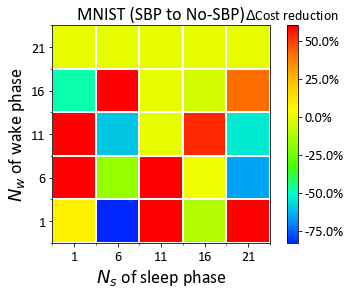

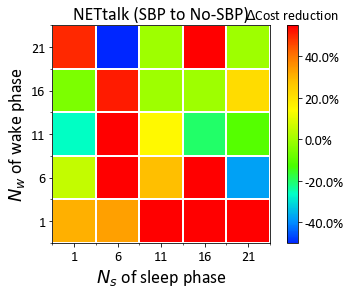

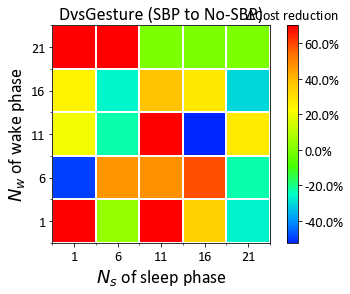

In [8]:
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
from matplotlib import colors
def dcmap():
    file_path='data/output.txt'
    fid=open(file_path)
    data=fid.readlines()
    data.reverse()
    n=len(data);
    rgb=np.zeros((n,3))
    for i in np.arange(2,n-1):
#     data[i].replace("'",'')
#     print(data[i].split(' '))
        rgb[i-1][0]=float(data[i].split(' ')[3])
        rgb[i-1][1]=float(data[i].split(' ')[4])
        rgb[i-1][2]=float(data[i].split(' ')[5].split("'")[0])
    rgb[1:-2]=rgb[1:-2]/255
    rgb[1:-2]
    icmap=colors.LinearSegmentedColormap.from_list('color',rgb[1:-2])
    return icmap
def to_percent(temp, position):
    return '%1.1f'%(100*temp) + '%'

# MNIST
plt.rcParams['font.size'] = 14
plt.rcParams['font.family'] = 'Calibri'
fig, ax = plt.subplots(1, 1)
matrix1 = readMatrix('data/mnist_matrix_cost_sbp1.xlsx')
accMatrix_sbp = matrix1
energyc1 = calEnergy(matrix1)
labelc1 = calLabel(matrix1)
matrix2 = readMatrix('data/mnist_matrix_cost_sbp0.xlsx')
accMatrix_no_sbp = matrix2
accMatrix = np.zeros((len(accMatrix_sbp),len(accMatrix_sbp[0])))
for i in range(len(accMatrix)):
    for j in range(len(accMatrix[0])):
        aa = accMatrix_sbp[i][j]
        bb = accMatrix_no_sbp[i][j]
        if aa==0 or bb==0:
            accMatrix[i][j]= 0
        else:
            accMatrix[i][j]= (bb-aa)/max(aa,bb)
plt.xlim((-0.5, 4.5))
plt.xticks([0,1,2,3,4],['1','6','11','16', '21'])
plt.ylim((-0.5, 4.5))
plt.yticks([0,1,2,3,4],['1','6','11','16','21'])
plt.imshow(accMatrix, cmap=dcmap(),vmax=0.6)  # https://blog.csdn.net/mizartian/article/details/88664412
plt.title('MNIST (SBP to No-SBP)',fontsize=18)
cbar = plt.colorbar()
cbar.ax.set_title(r'$\Delta$Cost reduction',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('$N_s$ of sleep phase',fontsize=18)
plt.ylabel('$N_w$ of wake phase',fontsize=18)
ax.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# fig.savefig('fig4c_cost_matrix_SBP_noSBP_mnist.svg')
energyc2 = calEnergy(matrix2)
labelc2 = calLabel(matrix2)

# NETtalk
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
matrix1 = readMatrix('data/nettalk_matrix_cost_sbp1.xlsx')
accMatrix_sbp = matrix1
energyg1 = calEnergy(matrix1)
labelg1 = calLabel(matrix1)
matrix2 = readMatrix('data/nettalk_matrix_cost_sbp0.xlsx')
accMatrix_no_sbp =matrix2
accMatrix = np.zeros((len(accMatrix_sbp),len(accMatrix_sbp[0])))
for i in range(len(accMatrix)):
    for j in range(len(accMatrix[0])):
        aa = accMatrix_sbp[i][j]
        bb = accMatrix_no_sbp[i][j]
        if aa==0 or bb==0:
            accMatrix[i][j]= 0
        else:
            accMatrix[i][j]= (bb-aa)/max(aa,bb)
plt.xlim((-0.5, 4.5))
plt.xticks([0,1,2,3,4],['1','6','11','16', '21'])
plt.ylim((-0.5, 4.5))
plt.yticks([0,1,2,3,4],['1','6','11','16','21'])
plt.imshow(accMatrix, cmap=dcmap(),vmax=0.55) 
plt.title('NETtalk (SBP to No-SBP)',fontsize=18)
cbar = plt.colorbar(format='%0.3f')
cbar.ax.set_title(r'$\Delta$Cost reduction',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('$N_s$ of sleep phase',fontsize=18)
plt.ylabel('$N_w$ of wake phase',fontsize=18)
ax.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# fig.savefig('fig4g_cost_matrix_SBP_noSBP_nettalk.svg')
energyg2 = calEnergy(matrix2)
labelg2 = calLabel(matrix2)

# DvsGesture
from matplotlib.ticker import LogFormatter 
from matplotlib.colors import LogNorm
import xlrd
plt.rcParams.update({'font.size': 14})
fig, ax = plt.subplots(1, 1)
matrix1 = readMatrix('data/gesture_matrix_cost_sbp1.xlsx')
accMatrix_sbp = matrix1
energyk1 = calEnergy(matrix1)
labelk1 = calLabel(matrix1)
matrix2 = readMatrix('data/gesture_matrix_cost_sbp0.xlsx')
accMatrix_no_sbp = matrix2
accMatrix = np.zeros((len(accMatrix_sbp),len(accMatrix_sbp[0])))
for i in range(len(accMatrix)):
    for j in range(len(accMatrix[0])):
        aa = accMatrix_sbp[i][j]
        bb = accMatrix_no_sbp[i][j]
        if aa==0 or bb==0:
            accMatrix[i][j]= 0
        else:
            accMatrix[i][j]= (bb-aa)/max(aa,bb)
plt.xlim((-0.5, 4.5))
plt.xticks([0,1,2,3,4],['1','6','11','16', '21'])
plt.ylim((-0.5, 4.5))
plt.yticks([0,1,2,3,4],['1','6','11','16','21'])
plt.imshow(accMatrix, cmap=dcmap(),vmax=0.7)
plt.title('DvsGesture (SBP to No-SBP)',fontsize=18)
cbar = plt.colorbar(format='%0.2f')
cbar.ax.set_title(r'$\Delta$Cost reduction',fontsize=14)
cbar.ax.yaxis.set_major_formatter(FuncFormatter(to_percent))
plt.xlabel('$N_s$ of sleep phase',fontsize=18)
plt.ylabel('$N_w$ of wake phase',fontsize=18)
ax.set_xticks(np.arange(-.5, 5, 1), minor=True);
ax.set_yticks(np.arange(-.5, 5, 1), minor=True);
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
# fig.savefig('fig4k_cost_matrix_SBP_noSBP_gesture.svg')
energyk2 = calEnergy(matrix2)
labelk2 = calLabel(matrix2)